In [1]:
import DirectDmTargets as dddm

Host: DESKTOP-URE1BBI.localdomain
Setting tmp folder to /tmp/


In [2]:
import time

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm

In [5]:
import numericalunits as nu

In [6]:
import wimprates as wr

# Finding the correct 'factor' #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

25 october 2019 

## Goal ## 
- in the DetectorSpectrum-class a factor is used to rebin the DM-spectrum. This rebinning should be fine enough to allow the numerical integration to be sufficiently accurate. However we don't want a too fine binning as it does increase computation time drastically. 

## Result ##
A factor (the factor between the the bins used for the numerical integration and the spectrum) is set to **10** as this proved a fair trade off between speed and accuracy.

CPU times: user 42.1 s, sys: 328 ms, total: 42.4 s
Wall time: 42.9 s


(0.0001, 100000000.0)

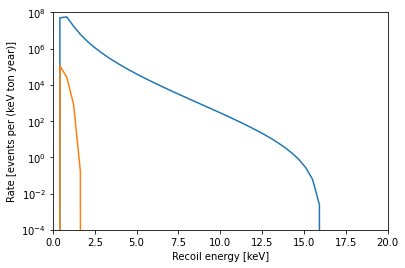

In [7]:
%%time
# NR's
energies = np.linspace(0.01, 20, 50)

# dr/dr
dr = ((nu.keV * (1000 * nu.kg) * nu.year) * 
    wr.rate_migdal(energies * nu.keV, 
                    mw=5 * nu.GeV/nu.c0**2, 
                    sigma_nucleon=1e-35 * nu.cm**2))

plt.plot(energies, dr, label="WIMPrates SHM")
dr = ((nu.keV * (1000 * nu.kg) * nu.year) * 
    wr.rate_migdal(energies * nu.keV, 
                    mw=0.5 * nu.GeV/nu.c0**2, 
                    sigma_nucleon=1e-35 * nu.cm**2))

plt.plot(energies, dr, label="WIMPrates SHM")

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")

plt.xlim(0, energies.max())
plt.yscale("log")

plt.ylim(1e-4,1e8)
# dr

CPU times: user 31.2 s, sys: 141 ms, total: 31.4 s
Wall time: 32 s


(0.0001, 100000000.0)

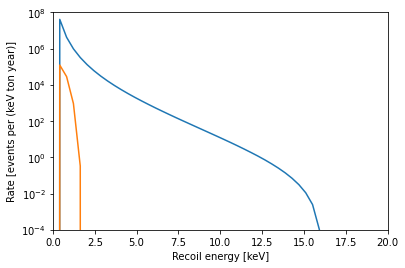

In [8]:
%%time
# NR's
energies = np.linspace(1e-3, 20, 50)

# dr/dr
dr = ((nu.keV * (1000 * nu.kg) * nu.year) * 
    wr.rate_migdal(energies * nu.keV, 
                    mw=5 * nu.GeV/nu.c0**2, 
                    sigma_nucleon=1e-35 * nu.cm**2, material = 'Ge'))

plt.plot(energies, dr, label="WIMPrates SHM 5 GeV/c2")

dr = ((nu.keV * (1000 * nu.kg) * nu.year) * 
    wr.rate_migdal(energies * nu.keV, 
                    mw=0.5 * nu.GeV/nu.c0**2, 
                    sigma_nucleon=1e-35 * nu.cm**2))

plt.plot(energies, dr, label="WIMPrates SHM 0.5 GeV/c2")

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")

plt.xlim(0, energies.max())
plt.yscale("log")

plt.ylim(1e-4,1e8)
# dr

In [ ]:
%%time
# NR's
energies = np.linspace(1e-3, 20, 1000)

# dr/dr
dr = ((nu.keV * (1000 * nu.kg) * nu.year) * 
    wr.rate_migdal(energies * nu.keV, 
                    mw=5 * nu.GeV/nu.c0**2, 
                    sigma_nucleon=1e-35 * nu.cm**2, material = 'Ge'))

plt.plot(energies, dr, label="WIMPrates SHM")

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")

plt.xlim(0, energies.max())
plt.yscale("log")

plt.ylim(1e-4,1e8)
# dr

## Distribution of the DM ##
First we need to make a DM-rate spectrum (below we first compare the un-smeared and smeared spectrum)

In [ ]:
use_SHM = dddm.SHM()

In [ ]:
# No detector resolution
def plot_spectrum(data, yerr = True, color = 'blue', label = 'label', linestyle = 'none'):
    plt.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']) if yerr else np.zeros(len(data['counts'])),
                color = color,
                linestyle = linestyle,
                capsize = 2,
                marker = 'o',
                label = label
                )
def plot_spectrum_ax(ax, data, yerr = True, color = 'blue', label = 'label', linestyle = 'none'):
    ax.errorbar(data['bin_centers'], data['counts'], 
                xerr=(data['bin_left'] - data['bin_right'])/2,
                yerr = np.sqrt(data['counts']) if yerr else np.zeros(len(data['counts'])),
                color = color,
                linestyle = linestyle,
                capsize = 2,
                marker = 'o',
                label = label
                )
def get_gal_spec(det, mw = 1, sigma = 1e-35, nbins = 10, E_max=None):
    events = dddm.GenSpectrum(mw, sigma, use_SHM, dddm.experiment[det])
    events.n_bins = nbins
    if E_max:
        events.E_max = E_max
    return events.get_data(poisson = False)

In [ ]:
def get_det_spec(det, mw = 1, sigma = 1e-35, nbins = 10, background = True,E_max = None):
    events = dddm.DetectorSpectrum(mw, sigma, use_SHM, dddm.experiment[det])
    events.n_bins = nbins
    if E_max:
        events.E_max = E_max
    events.add_background = background
    return events.get_data(poisson = False)

In [ ]:
plt.rcParams['axes.grid'] = True

def plot_spectra(det, mw = 1, sigma = 1e-35, nbins = 10, E_max = None):
    fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, figsize = (14,14), sharex = True)
    
    gal_spec = get_gal_spec(det, mw = mw, sigma = sigma, nbins = nbins, E_max=E_max)
    bg_spec = get_det_spec(det, mw = mw, sigma = sigma, nbins = nbins, E_max=E_max)
    no_bg_spec = get_det_spec(det, mw = mw, sigma = sigma, nbins = nbins, background = False, E_max=E_max)
    
    plot_spectrum_ax(ax1, gal_spec, color = 'red', 
                     label = f'{det} without det. parameters (gal_spec)')
    
    plot_spectrum_ax(ax1,bg_spec,color =  'black', 
                     label = f'{det} with background (bg_spec)')
   
    plot_spectrum_ax(ax1,no_bg_spec,color =  'blue', 
                     label = f'{det} without background (no_bg_spec)')
    
    ax1.set_ylim(bottom=np.max([plt.ylim()[-1], (1e-10 * 10/nbins)]))
#     ax1.legend()
    
    
#     ax1.set_ylim(np.min(no_bg_spec['counts'].values), 
#                  np.max(bg_spec['counts'].values) * 1.5)
    ax1.set_yscale("log")
#     ax1.grid(axis="both")
    
    plot_spectrum_ax(ax2, gal_spec, color = 'red', 
                     label = f'{det} without det. parameters')
    plot_spectrum_ax(ax2,bg_spec,color =  'black', 
                     label = f'{det} with background')
    plot_spectrum_ax(ax2,no_bg_spec,color =  'blue', 
                     label = f'{det} without background')
#     ax2.legend()
#     ax2.grid(axis="both")
    
    diff_bg = bg_spec.copy()
    diff_bg['counts'] = bg_spec['counts'] - no_bg_spec['counts']
    plot_spectrum_ax(ax3, diff_bg, color = 'orange',yerr = False, 
                     label = f'{det} background (bg - no_bg)')
#     ax3.legend()
#     ax3.grid(axis="both")
   
    diff_gal = gal_spec.copy()
    diff_gal['counts'] = gal_spec['counts'] - no_bg_spec['counts']
    plot_spectrum_ax(ax4,diff_gal, color = 'green', yerr = False, 
                     label = f'{det} gal-spec diff (gal. - no_bg)')
#     ax4.legend()
#     ax4.grid(axis="both")
    
    for ax in [ax1,ax2,ax3, ax4]:
        ax.axvline(dddm.experiment[det]['E_thr'], label = 'energy threshold')
        ax.grid(axis="both")
        ax.legend()

In [ ]:
dddm.experiment['Ge_migd_iZIP_bg']

In [ ]:
dddm.experiment['Ge_migd_iZIP_bg']

In [ ]:
n_bins_dict = {'Ge_migd_iZIP_bg':[100, 1000], 'Ge_migd_HV_bg':[100, 1000]}
for mw in [0.1, 0.5, 1, 5]:
    for det in ['Ge_migd_iZIP_bg', 'Ge_migd_HV_bg']:
        for nbins in n_bins_dict[det]:
            t0 = time.time()
            print(f'-- mw = {mw} for {det} -- ')
            plot_spectra(det, mw = mw, nbins = nbins,E_max = 10)
            for f_type in  ['png', 'pdf']:
                plt.savefig(f'figures/spectrum_{det}_mw-{mw}_nbin-{nbins}.{f_type}', dpi = 100)
            plt.show()
            print(f'done in {time.time() -t0} s = {int((time.time() -t0)/60)} m')
            print()

In [ ]:
assert False